In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import random
import random
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
import numpy as np

import tensorflow.keras.backend as K

In [2]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 643.8 kB/s eta 0:00:00


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
indices = list(range(len(x_train)))
random.shuffle(indices)

In [6]:
print(indices)

[13655, 12525, 16209, 21135, 48696, 22062, 22082, 10433, 52993, 12208, 20134, 46392, 14269, 9119, 7508, 10682, 51035, 19512, 38138, 30654, 54064, 17919, 27258, 35239, 17390, 50373, 6158, 2473, 9178, 54920, 36543, 51413, 41760, 31919, 45075, 10525, 28035, 53721, 6613, 15384, 22354, 2148, 13665, 14825, 56475, 2202, 35596, 41140, 22598, 30599, 53758, 26656, 19293, 26530, 53366, 14888, 10534, 14351, 45543, 8898, 55273, 28488, 1310, 315, 17857, 9680, 26602, 50905, 6779, 9144, 18225, 30861, 18373, 17088, 59384, 14682, 30706, 38804, 30354, 7390, 21023, 4141, 39571, 353, 28227, 58714, 50182, 32901, 9788, 54835, 59033, 42220, 48512, 17997, 45769, 2022, 50691, 1126, 1660, 12935, 44695, 59907, 58376, 27752, 28580, 13015, 24087, 21936, 31362, 41447, 41971, 58345, 54135, 43763, 7773, 58583, 18631, 39548, 43299, 20618, 6275, 1041, 58350, 28762, 31716, 49683, 52637, 40744, 50177, 16845, 54996, 15960, 53693, 22046, 26372, 18853, 48324, 40705, 26920, 45818, 26263, 1763, 59533, 18680, 49669, 34281, 2233

In [7]:
x_train = x_train[indices]
y_train = y_train[indices]

In [8]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


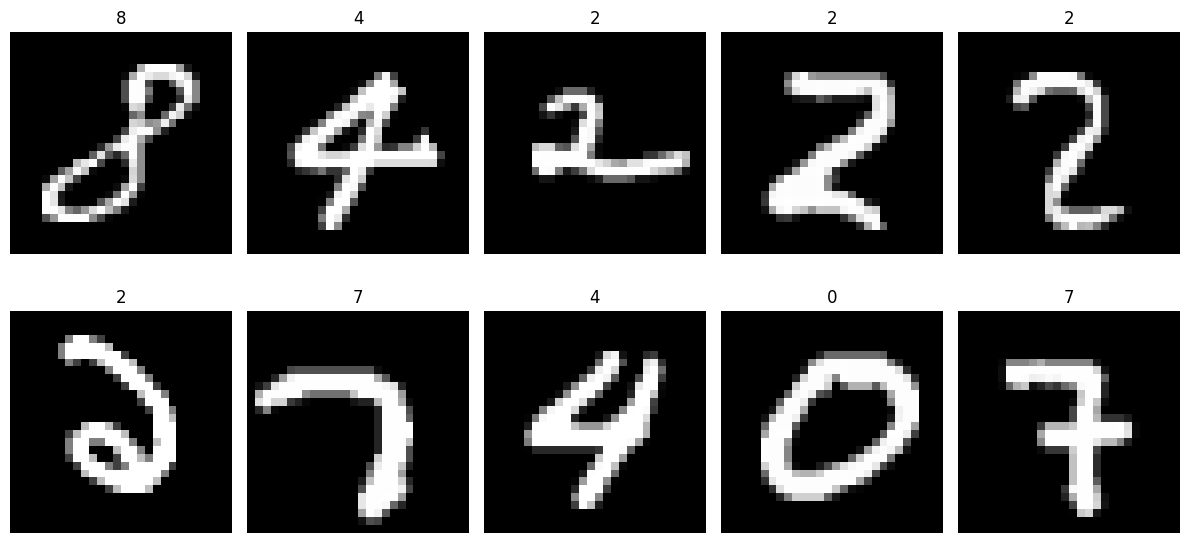

In [9]:
num_images = 10
num_rows = 2
num_cols = num_images // num_rows


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
axes = axes.flatten()


for i in range(num_images):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
num_classes = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [12]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [14]:
input_shape = x_train.shape[1:]
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x=Flatten()(x)
print(x.shape)

x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

(None, 576)


In [15]:
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 11s 6ms/step - loss: 0.1721 - accuracy: 0.9471 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 2/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0314 - val_accuracy: 0.9895
Epoch 3/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0410 - val_accuracy: 0.9876
Epoch 5/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0229 - val_accuracy: 0.9931
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0321 - val_accuracy: 0.9915
Epoch

In [17]:
# Get the names of the layers
layer_names = [layer.name for layer in model.layers]

# Print the layer names
for name in layer_names:
    print(name)

input_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_2
dense_3


In [44]:
def generate_gradcam(model, images, labels, target_layer):
    for image, label in zip(images, labels):
        print(label)
        gradcam = Gradcam(model,model_modifier=ReplaceToLinear(), clone=False)
        score = CategoricalScore(np.argmax(label))
        cam = gradcam(score, image, penultimate_layer=target_layer)
        # Min-max normalization
        cam_min = np.min(cam)
        cam_max = np.max(cam)
        cam = (cam - cam_min) / (cam_max - cam_min)
        yield cam

In [45]:
images = x_test[:10]
labels = y_test[:10]
print(images.shape,labels.shape)

(10, 28, 28, 1) (10, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1/1 [==============================] - 0s 18ms/step


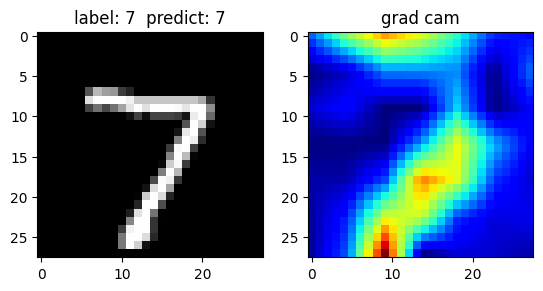

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 17ms/step


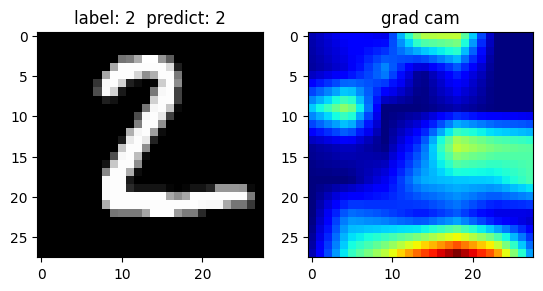

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 17ms/step


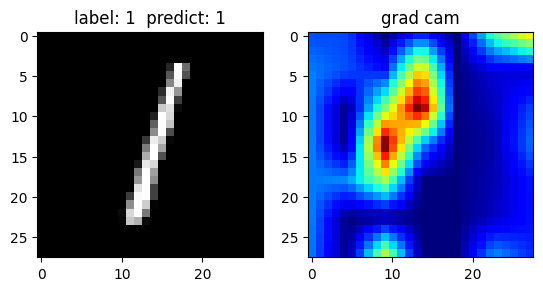

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 17ms/step


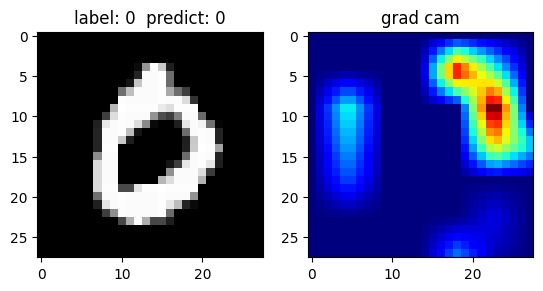

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 19ms/step


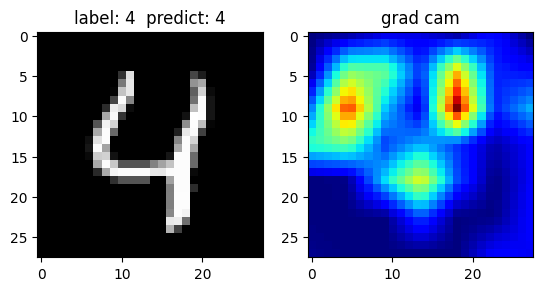

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 16ms/step


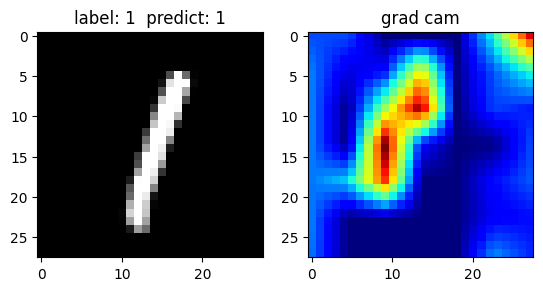

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 17ms/step


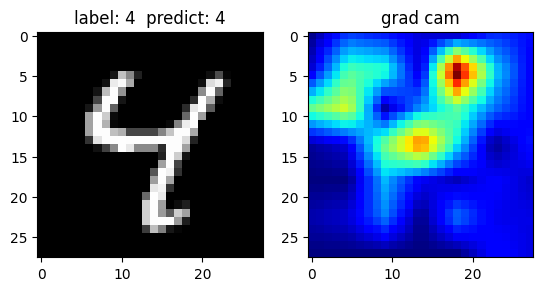

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 17ms/step


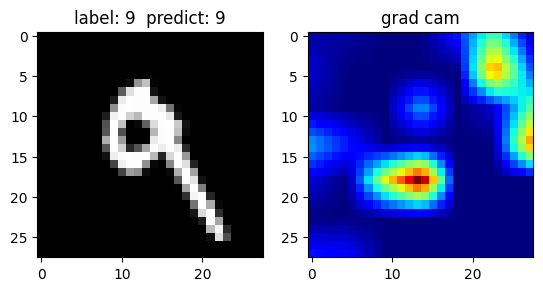

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 16ms/step


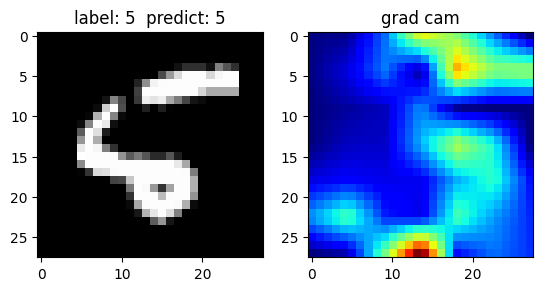

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 20ms/step


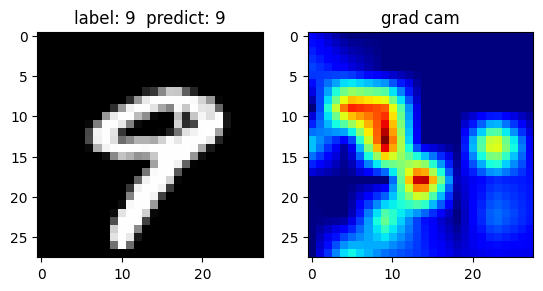

In [48]:

# Generate Grad-CAM heatmaps
heatmaps = generate_gradcam(model, images, labels, 'conv2d_5')

# Iterate over images and heatmaps
for i, (image, heatmap) in enumerate(zip(images, heatmaps)):
    plt.figure()
    plt.subplot(1, 2, 1)
    u=model.predict(np.expand_dims(image,axis=0))
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'label: {np.argmax(labels[i])}  predict: {np.argmax(u)}')

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap.squeeze(), cmap='jet')
    plt.title('grad cam')

    plt.show()